In [ ]:
# Visualizing intermediate activations

In [1]:
from keras.models import load_model


model = load_model('dogs-vs-cats/model/small_2.h5')
model.summary()

2022-07-27 12:45:30.679580: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-27 12:45:30.683518: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [5]:
from keras.utils import load_img, img_to_array
import numpy as np


img_path = 'dogs-vs-cats/test/cats/cat.1700.jpg'
img = load_img(img_path, target_size=(150, 150))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

(150, 150, 3)
(1, 150, 150, 3)


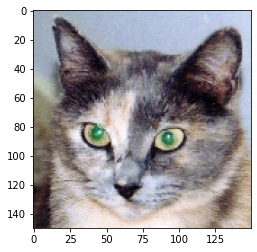

In [6]:
import matplotlib.pyplot as plt


plt.imshow(img_tensor[0])
plt.show()

In [8]:
from keras import models


layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [9]:
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 180ms/step


In [10]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


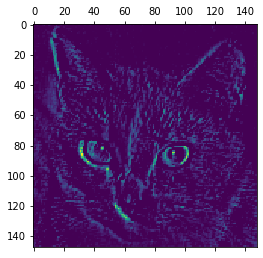

In [12]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

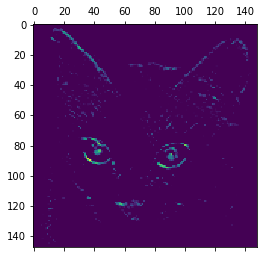

In [13]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

/tmp/ipykernel_191861/3447812840.py:15: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


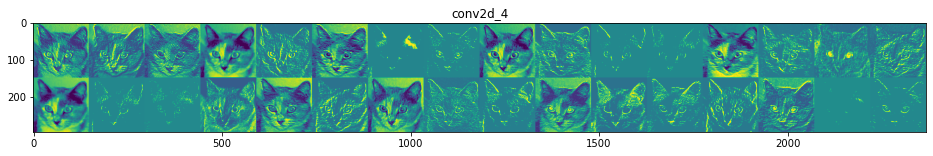

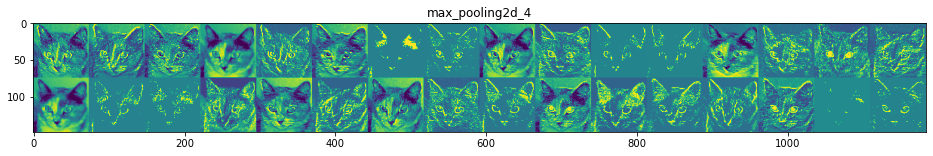

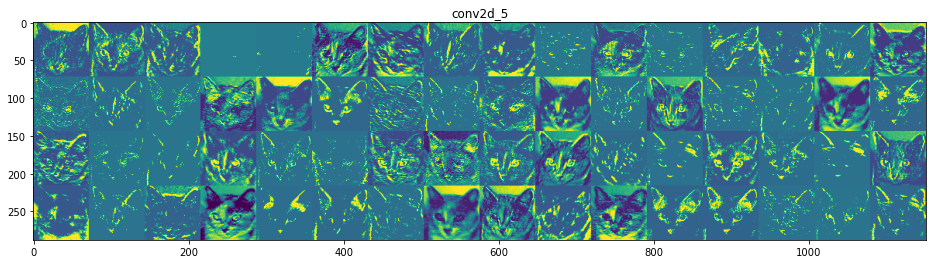

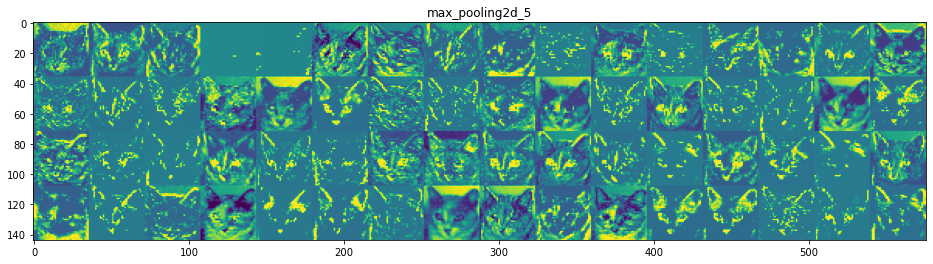

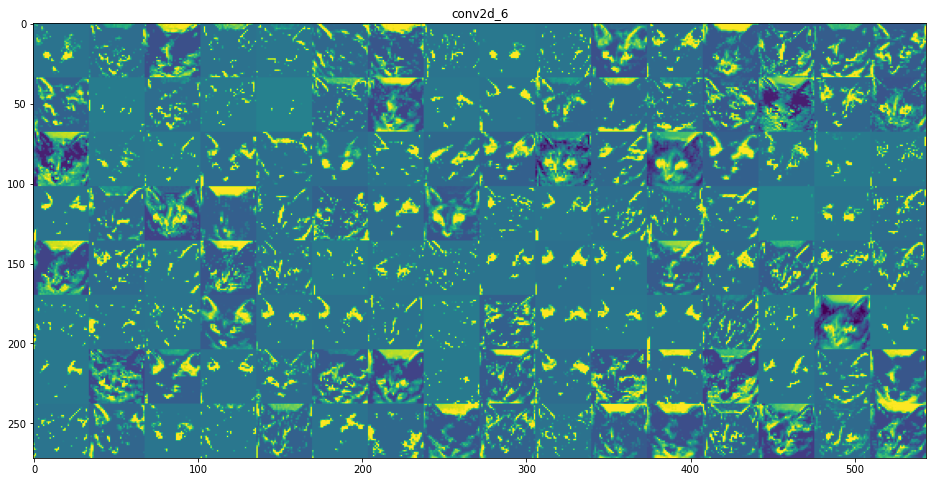

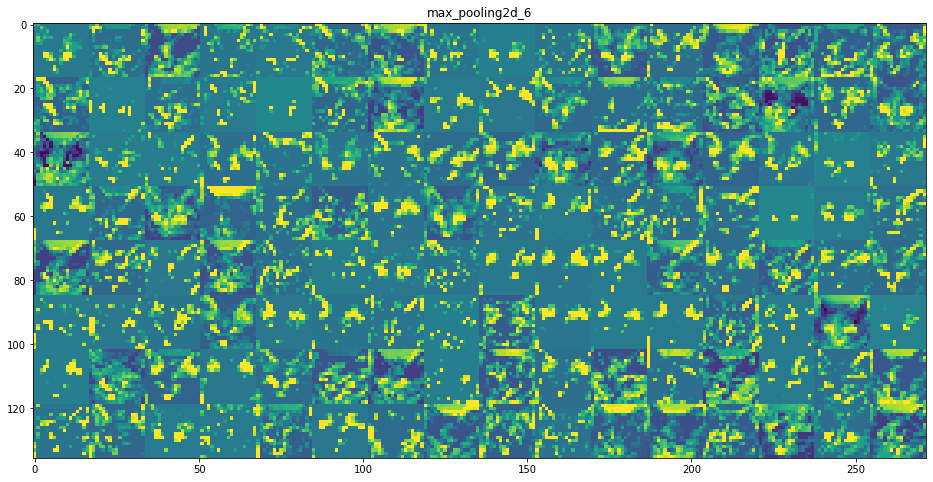

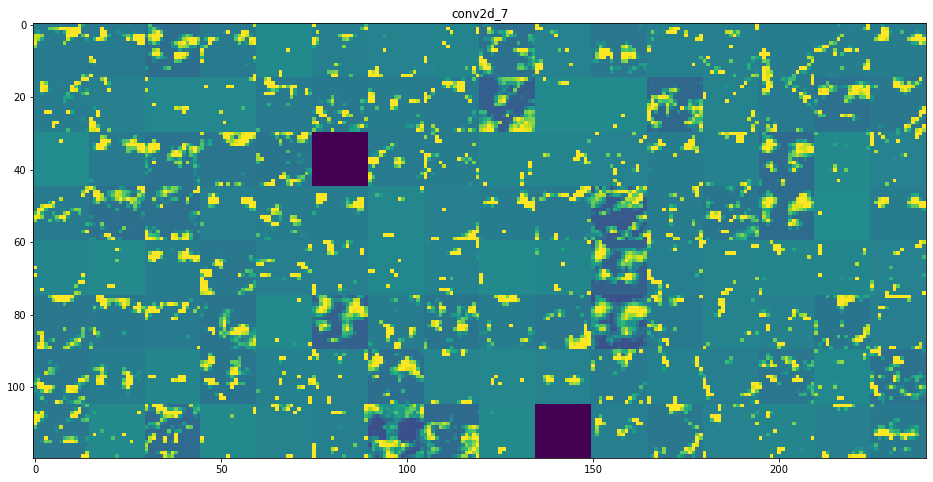

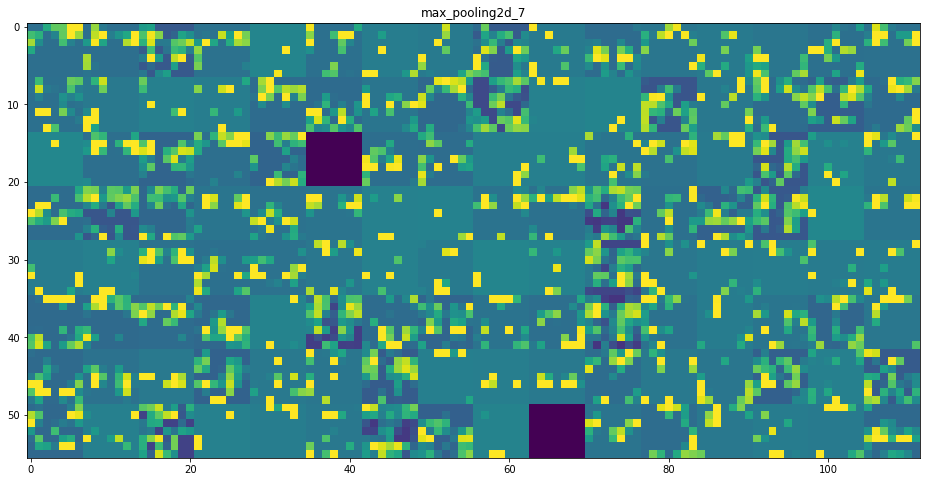

In [17]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, 
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=((scale * display_grid.shape[1],
                        scale * display_grid.shape[0])))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
# We have just evidenced an important universal characteristic of the representations 
# learned by deep neural networks: 
# the features extracted by a layer become increasingly abstract with the depth of the layer. 
# The activations of higher layers carry less and less information about the specific input being seen, 
# and more and more information about the target (in this case, the class of the image: cat or dog). 
# A deep neural network effectively acts as an information distillation pipeline, 
# with raw data going in (in this case, RGB pictures) and being repeatedly transformed 
# so that irrelevant information is filtered out (for example, the specific visual appearance of the image), 
# and useful information is magnified and refined (for example, the class of the image).